# Desafío - Gráficos

## Desafío 1. Genere una submuestra de casos

In [117]:
import pandas as pd
df = pd.read_csv('qog_std_cs_jan18.csv')
df_sample = df.sample(frac=0.5, random_state=5526)
df_sub = df_sample.loc[:, ['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']]
df_sub['ht_region'] = df_sub['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem', 'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'])
df_sub.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
64,0.924,DEU,WesternDem,39486.6990,80.983002,3.400000,11.03,30.700001,11.297001
83,0.466,CIV,SubSaharian,1354.2900,22.524000,76.199997,3.15,NaN,5.716274
98,0.719,LBY,NorthAfrica,4102.8398,6.266000,13.200000,0.00,NaN,4.968935
58,0.893,FIN,WesternDem,36958.2110,5.427000,2.400000,8.80,21.799999,9.679909
81,0.898,ISR,NorthAfrica,25926.2500,8.212000,3.300000,2.62,30.400000,7.808308


## Desafío 2. Genere una función que ingrese su objeto y devuelva:

In [64]:
def estadisticas(df):
    for column, serie in df.iteritems():
        print("Columna {}".format(column))
        if serie.dtype == 'float64':
            # columna es continua, calcula medidas descriptivas    
            print(serie.describe())
        else:
            # columna es discreta, calcula frecuencia
            print(serie.value_counts())

estadisticas(df_sub)

Columna undp_hdi
count    90.000000
mean      0.687256
std       0.147244
min       0.351000
25%       0.559750
50%       0.721500
75%       0.792750
max       0.924000
Name: undp_hdi, dtype: float64
Columna ccodealp
COG    1
AFG    1
IRQ    1
ECU    1
CIV    1
SLV    1
LIE    1
BEN    1
POL    1
MNE    1
MMR    1
TWN    1
BLR    1
CPV    1
CHL    1
ROU    1
QAT    1
DEU    1
STP    1
VCT    1
SRB    1
MWI    1
GEO    1
BWA    1
UZB    1
VNM    1
FSM    1
SYR    1
SLB    1
GHA    1
      ..
ISL    1
SOM    1
MOZ    1
IDN    1
PRT    1
MDV    1
MCO    1
NER    1
GIN    1
ARG    1
MLI    1
ALB    1
BDI    1
BGR    1
COL    1
MHL    1
UKR    1
GRC    1
KWT    1
ISR    1
AZE    1
JOR    1
PRK    1
BEL    1
MDG    1
LSO    1
TUR    1
NAM    1
KIR    1
LKA    1
Name: ccodealp, Length: 97, dtype: int64
Columna ht_region
SubSaharian      23
EastEurope       16
NorthAfrica      14
LatAm            10
WesternDem       10
SouthEastAsia     6
Pacific           6
EastAsia          4
SouthAsia      

### Estadísticas descriptivas para gle_cgdpc , undp_hdi , imf_pop

In [66]:
estadisticas(df_sub.loc[:, ['gle_cgdpc', 'undp_hdi', 'imf_pop']])

Columna gle_cgdpc
count        97.000000
mean      13671.963121
std       20514.032447
min         332.269990
25%        2223.010000
50%        6912.279800
75%       14563.140000
max      108481.130000
Name: gle_cgdpc, dtype: float64
Columna undp_hdi
count    90.000000
mean      0.687256
std       0.147244
min       0.351000
25%       0.559750
50%       0.721500
75%       0.792750
max       0.924000
Name: undp_hdi, dtype: float64
Columna imf_pop
count     70.000000
mean      25.397543
std       39.522762
min        0.011000
25%        3.003750
50%       10.664000
75%       30.488000
max      252.164993
Name: imf_pop, dtype: float64


## Desafío 3. Genere una función que liste las observaciones perdidas de una variable

In [123]:
def observaciones_perdidas(dataframe, var, print_list = False):
    """
    observaciones_perdidas: Retorna la cantidad de casos perdidos y el porcentaje correspondiente.
    @param dataframe: La función debe ingresar un objeto DataFrame
    @param var: Variable a inspeccionar
    @param print_list: Opción para imprimir la lista de observaciones perdidas en la variable
    @return Cuando print_list == True, retorna la lista de casos considerando el codigo del pais (ccodealp). Sino retorna la cantidad de casos perdidos y el porcentaje correspondiente
    """
    cantidad = dataframe[var].isna().value_counts().get(True)
    porcentaje = dataframe[var].isna().value_counts(normalize = True).get(True)
    
    if print_list == True:
        return dataframe[dataframe[var].isna()]['ccodealp']
    
    return cantidad, porcentaje
    
for column, serie in df_sub.iteritems():
    cantidad, porcentaje = observaciones_perdidas(df_sub, column)
    if cantidad == None:
        cantidad = 0
    if porcentaje == None:
        porcentaje = 0.0
    print("La columna {} tiene {} datos perdidos y corresponde a un {}".format(column, cantidad, porcentaje))
    



La columna undp_hdi tiene 7 datos perdidos y corresponde a un 0.07216494845360824
La columna ccodealp tiene 0 datos perdidos y corresponde a un 0.0
La columna ht_region tiene 0 datos perdidos y corresponde a un 0.0
La columna gle_cgdpc tiene 0 datos perdidos y corresponde a un 0.0
La columna imf_pop tiene 27 datos perdidos y corresponde a un 0.27835051546391754
La columna wef_imort tiene 24 datos perdidos y corresponde a un 0.24742268041237114
La columna who_alc2000 tiene 7 datos perdidos y corresponde a un 0.07216494845360824
La columna who_tobt tiene 38 datos perdidos y corresponde a un 0.3917525773195876
La columna wdi_exph tiene 4 datos perdidos y corresponde a un 0.041237113402061855


### Tres países con mayor ausencia de datos (se considera codigo de pais ya que no esta nombre)

In [124]:
#who_tobt, imf_pop, wef_imort
print("Columna who_tobt")
print(observaciones_perdidas(df_sub, 'who_tobt', True))
print("Columna imf_pop")
print(observaciones_perdidas(df_sub, 'imf_pop', True))
print("Columna wef_imort")
print(observaciones_perdidas(df_sub, 'wef_imort', True))

Columna who_tobt
83     CIV
98     LBY
172    TGO
190    VEN
111    MCO
105    MDV
17     BOL
145    KNA
169    SYR
89     PRK
91     KWT
102    MDG
141    QAT
0      AFG
149    STP
37     TWN
5      ATG
176    TUN
19     BWA
52     SLV
114    MNE
192    YEM
79     IRQ
22     SLB
130    PLW
99     LIE
129    MHL
144    RWA
182    MKD
128    FSM
68     GRD
148    SMR
147    VCT
70     GIN
26     BDI
159    SOM
175    ARE
179    TUV
Name: ccodealp, dtype: object
Columna imf_pop
40     COG
190    VEN
111    MCO
145    KNA
169    SYR
89     PRK
102    MDG
149    STP
5      ATG
176    TUN
19     BWA
52     SLV
192    YEM
99     LIE
1      ALB
65     GHA
72     HTI
118    NAM
42     CRI
76     IND
73     HND
68     GRD
95     LSO
26     BDI
125    NER
159    SOM
175    ARE
Name: ccodealp, dtype: object
Columna wef_imort
172    TGO
40     COG
111    MCO
105    MDV
145    KNA
89     PRK
0      AFG
189    UZB
149    STP
5      ATG
79     IRQ
22     SLB
130    PLW
99     LIE
129    MHL
27     BL

## Desafío 4. Grafique los histogramas

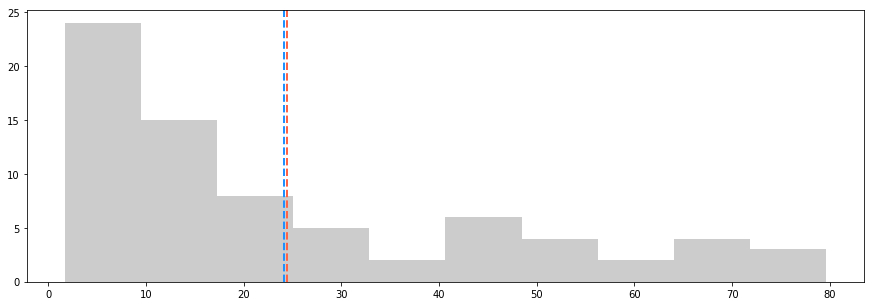

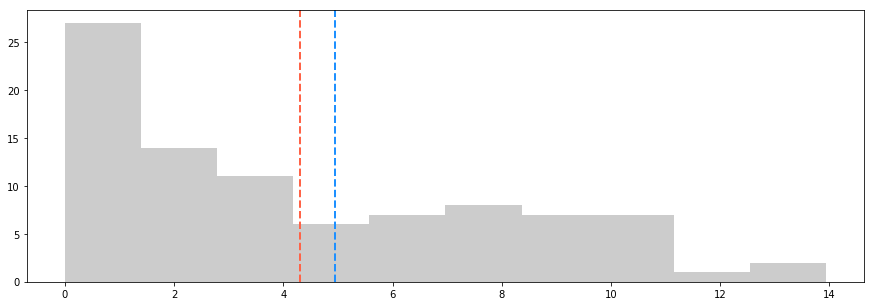

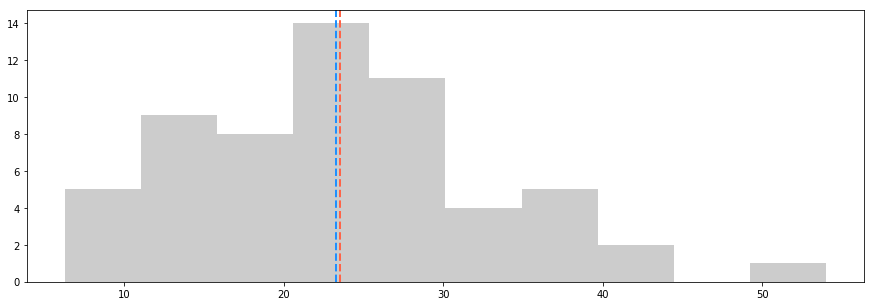

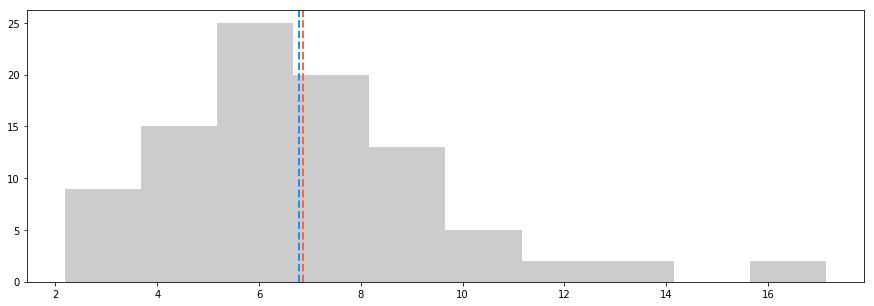

In [151]:
import matplotlib.pyplot as plt

def histograma(dataframe, var, true_mean, sample_mean = False):
    """
    histograma: Grafique un histograma en conjunto y señala las medias
    @param dataframe:  La base de datos donde se encuentran los datos específicos.
    @param var:  La variable a graficar
    @param sample_mean: Si es verdadero, genera una recta vertical indicando la media de la variable en la selección muestral
    @param true_mean: Si es verdadero, genera una recta vertical indicando la media de variable en la base de datos completa
    """
    
    var_dropna_sub = dataframe[var].dropna()
    plt.figure(figsize = (15, 5))
    plt.hist(var_dropna_sub, color='gray', alpha=.4)
    if true_mean is not False:
        plt.axvline(true_mean, color='dodgerblue', linestyle='--', lw=2)
        
    if sample_mean is not False:
        plt.axvline(sample_mean, color='tomato', linestyle='--', lw=2)

for var in ['wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']:
    true_mean = df[var].dropna().mean()
    sample_mean = df_sub[var].dropna().mean()
    histograma(df_sub, var, true_mean, sample_mean)


### La media de la submuestra es mayor a la media completa en las variables wef_imort, who_tobt y wdi_exph

## Desafío 5. Genere una función que devuelva un dotplot

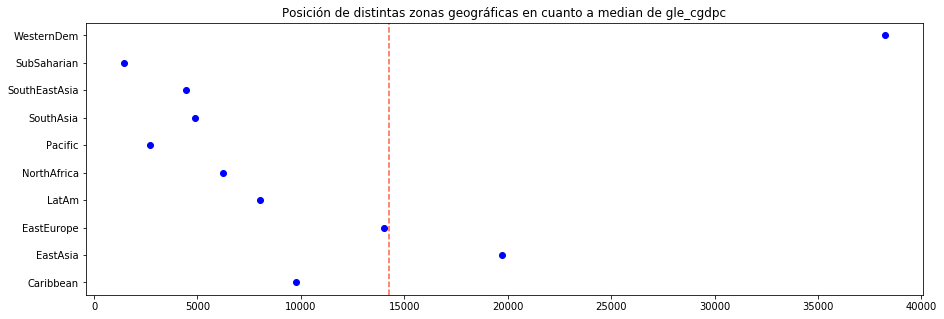

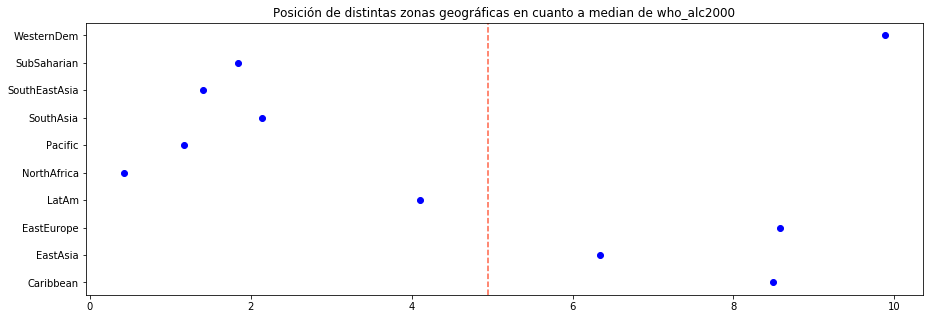

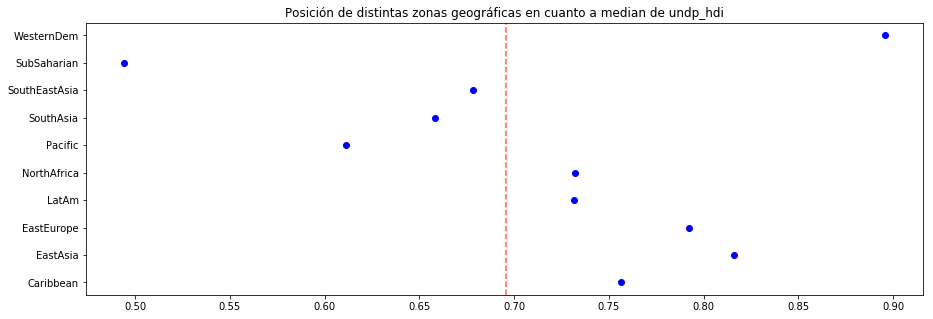

In [180]:
def dotplot(dataframe, plot_var, plot_by, global_stat = False, statistic = 'mean'):
    """
    dotplot: Devuelve un dotplot
    @param dataframe: La tabla de datos donde buscar las variables.
    @param plot_var: La variable a analizar y extraer las medias.
    @param plot_by: La variable agrupadora.
    @param global_stat: Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False.
    @param statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean.
    """
    if statistic == 'mean':
        group_statistic = df_sub.groupby('ht_region')[plot_var].mean()
    else:
        group_statistic = df_sub.groupby('ht_region')[plot_var].median()
    
    plt.figure(figsize = (15, 5))
    plt.title('Posición de distintas zonas geográficas en cuanto a {} de {}'.format(statistic, plot_var))
    plt.plot(group_statistic.values, group_statistic.index, 'o', color = 'blue')
    
    if global_stat != False:
        plt.axvline(global_stat, color = 'tomato', linestyle = '--')

for plot_var in ['gle_cgdpc', 'who_alc2000', 'undp_hdi']:
    plot_by = 'ht_region'
    global_stat = df[plot_var].mean()
    statistic = 'median'
    dotplot(df_sub, plot_var, plot_by, global_stat, statistic)

## Desafío 6. Guarde la base de datos

In [182]:
df_sub.to_csv('subsample_javh_demo.csv')